# Crack tip analysis

Given ParaView output raw crack tip trajectory data, this will calculate crack tip length, speed, and velocities in x and y direction and output them to a new csv file.

This can be modified to work with the z direction in the future.

> To obtain ParaView output raw crack tip trajectory, see [PDcracktip](https://github.com/lyyc199586/pvfilters)
 
example csv input:
```csv
"Time","Points:0","Points:1","Points:2"
0,50,0,0
0.25,50,0,0
0.5,50,0,0
...
```

## Separate analysis of crack tip trajectory, length and velocity

,Time,Smoothed:0,Smoothed:1
0,0.00000,1.989795,-0.007928
1,0.00025,2.007875,0.014131
2,0.00050,2.019113,0.007197
3,0.00075,2.011013,-0.006851
4,0.00100,1.987770,-0.015479
...,...,...,...
109,0.02900,44.038830,6.404450
110,0.02925,44.440416,6.404110
111,0.02950,44.831853,6.404100
112,0.02975,45.224394,6.420520


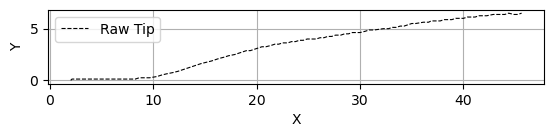

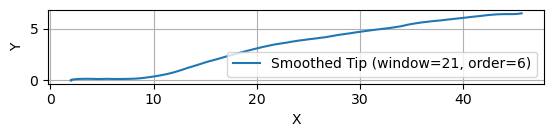

In [ ]:
from cm_vis.fem.cracktip import CrackTipAnalyzer

analyzer = CrackTipAnalyzer("sample_data/sample_crack_tip_data.csv")
analyzer.set_savgol_params(window_length=21, poly_order=6)
analyzer.plot_trajectory()
analyzer.calc_smooth_trajectory(plot=True)

0       0.000000
1       0.028522
2       0.041728
3       0.057944
4       0.082737
         ...    
109    42.852794
110    43.254379
111    43.645816
112    44.038701
113    44.459207
Name: Smoothed Length, Length: 114, dtype: float64

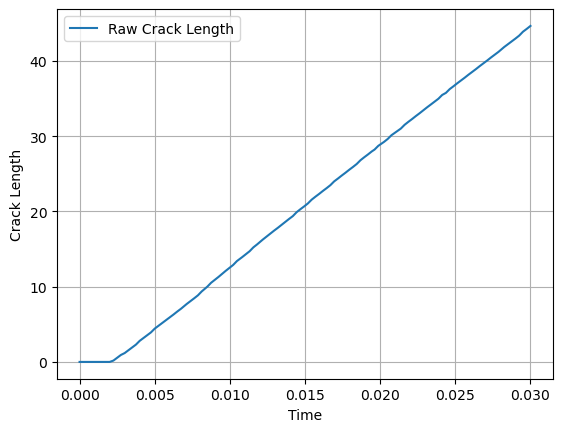

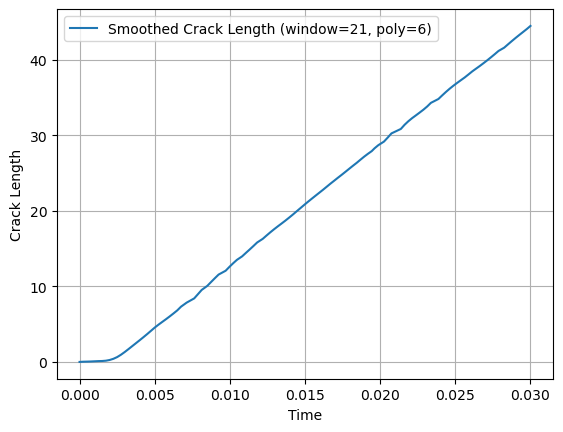

In [26]:
analyzer.calc_crack_length(plot=True)
analyzer.calc_crack_length(use_smoothed=True, plot=True)

0         0.000000
1        72.320344
2        44.952908
3        32.401814
4        92.972386
          ...     
109    1658.814493
110    1606.341525
111    1565.747601
112    1570.166904
113    1665.764670
Name: Smoothed Velocity:0, Length: 114, dtype: float64

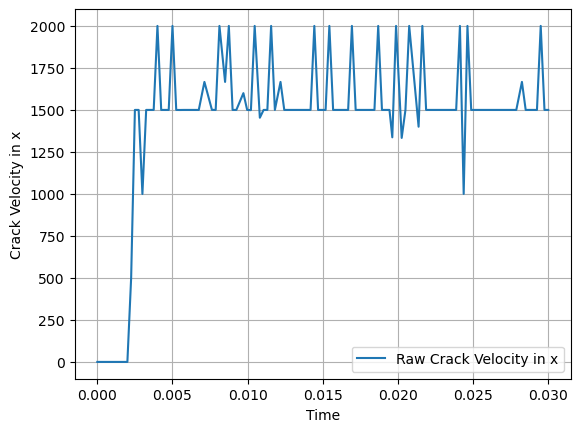

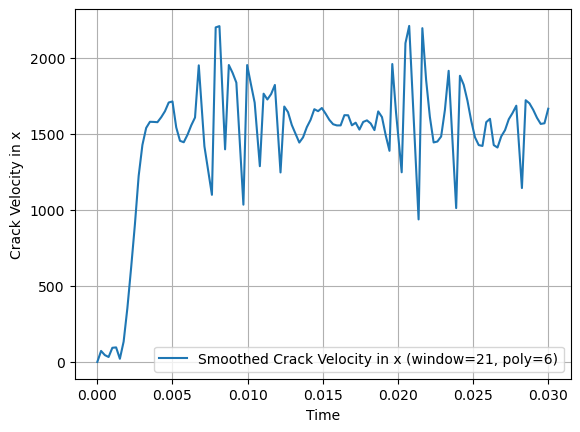

In [27]:
analyzer.calc_crack_velocity(0, plot=True)
analyzer.calc_crack_velocity(0, use_smoothed=True, plot=True)

## Complete analysis at once

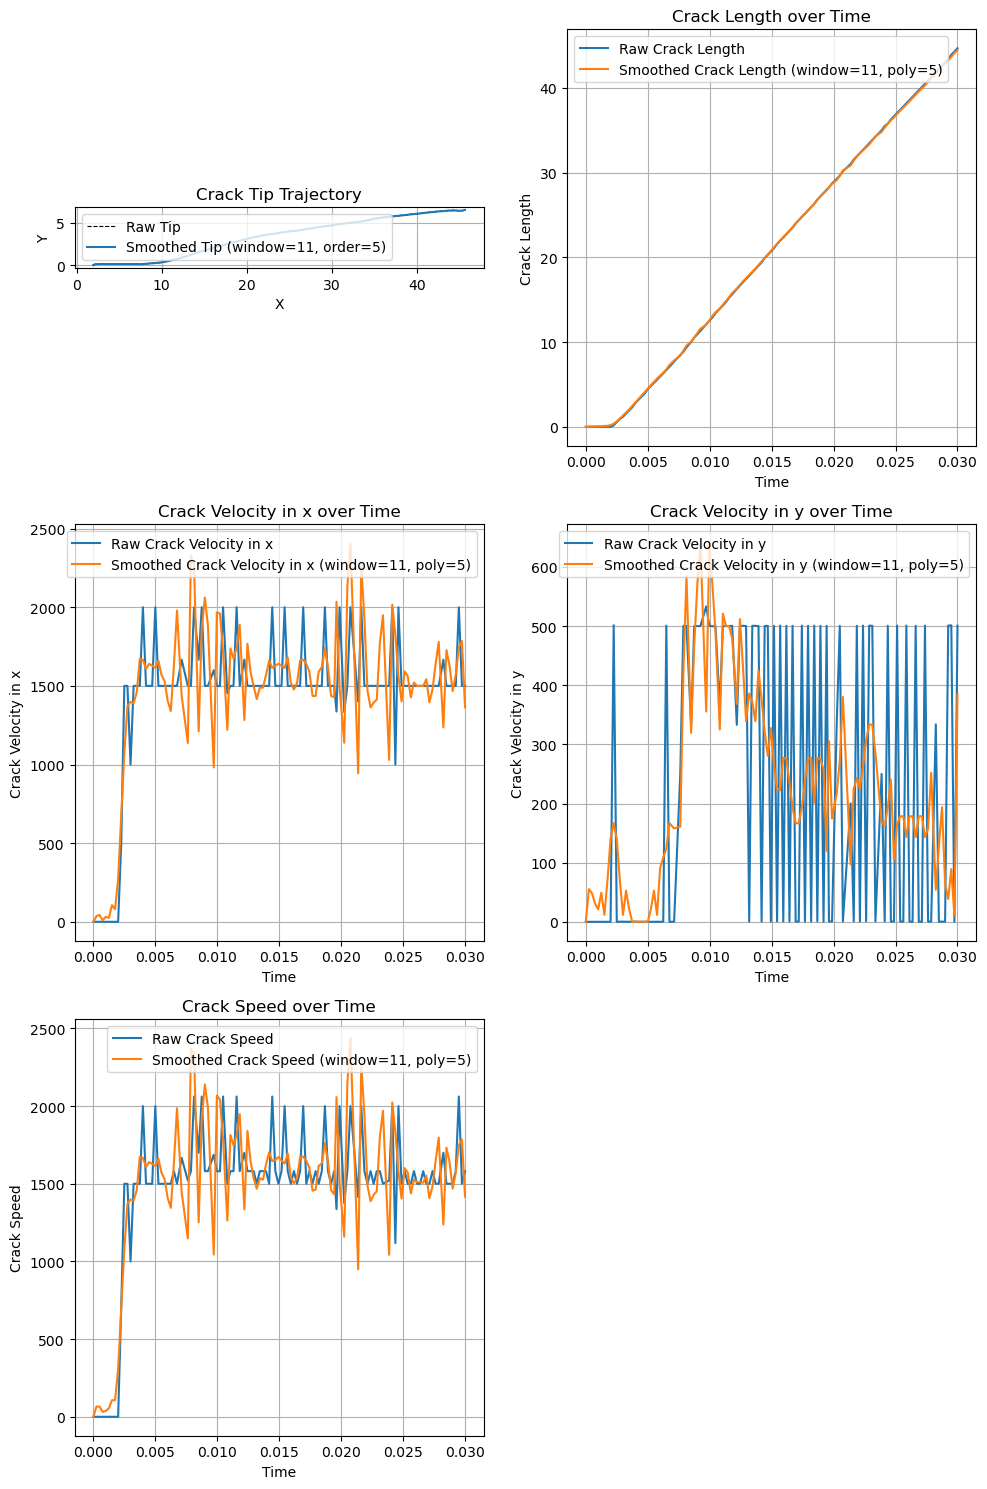

In [28]:
from cm_vis.fem.cracktip import CrackTipAnalyzer

filename = "sample_crack_tip_raw_data"
filepath = f"sample_data/{filename}.csv"

# smooth params
window_length = 11
poly_order = 5

analyzer = CrackTipAnalyzer(filepath)
analyzer.set_savgol_params(window_length, poly_order)
analyzer.analyze()
analyzer.save_to_csv(f"sample_data/{filename}_wl{window_length}_po{poly_order}.csv")